# Housing Price Analysis & Predicition

-----

## 1. Problem Statement
- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a regression model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

## 2. Data Collection
This dataset was collected from Kaggle.<br>
Link for dataset : https://www.kaggle.com/datasets/goelyash/housing-price-dataset-of-delhiindia

## 3. Data Ingestion

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading Dataset
df = pd.read_csv(r"Delhi_v2.csv")

In [3]:
#Printing First 5 Rows
df.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


## 4. Data Cleaning & Transformation

In [4]:
#Checking number of rows & columns
df.shape

(7738, 18)

In [5]:
#Checking column's informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7738 non-null   int64  
 1   price             7738 non-null   float64
 2   Address           7738 non-null   object 
 3   area              7738 non-null   float64
 4   latitude          7738 non-null   float64
 5   longitude         7738 non-null   float64
 6   Bedrooms          7738 non-null   float64
 7   Bathrooms         7738 non-null   float64
 8   Balcony           5166 non-null   float64
 9   Status            7164 non-null   object 
 10  neworold          7738 non-null   object 
 11  parking           2612 non-null   float64
 12  Furnished_status  4124 non-null   object 
 13  Lift              1733 non-null   float64
 14  Landmarks         2759 non-null   object 
 15  type_of_building  7738 non-null   object 
 16  desc              7738 non-null   object 


In [6]:
#Dropping Unrelated Columns
df.drop(columns=['Unnamed: 0', 'Address', 'Status', 'desc','Landmarks','Price_sqft','Furnished_status'], inplace=True)

In [7]:
#Converting Prices in terms of Lakhs
df['price'] = df['price']/100000

In [8]:
#Checking for Null Values
df.isnull().sum()

price                  0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
neworold               0
parking             5126
Lift                6005
type_of_building       0
dtype: int64

In [9]:
#Replacing Null values with 0
df.replace(np.nan,0,inplace=True)

In [10]:
#Checking data after cleaning
df.tail()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,neworold,parking,Lift,type_of_building
7733,79.0,1095.0,28.635272,77.370395,2.0,2.0,0.0,Resale,0.0,0.0,Flat
7734,45.1,1060.0,28.581431,77.452819,2.0,2.0,3.0,Resale,0.0,0.0,Flat
7735,70.0,1898.0,28.625850,77.435336,4.0,3.0,5.0,Resale,0.0,0.0,Flat
7736,65.0,1400.0,28.701622,77.430153,3.0,3.0,2.0,Resale,1.0,3.0,Flat
7737,65.0,1750.0,28.693590,77.344376,3.0,2.0,3.0,New Property,0.0,0.0,Flat


## 5. EDA

<Figure size 1080x1080 with 0 Axes>

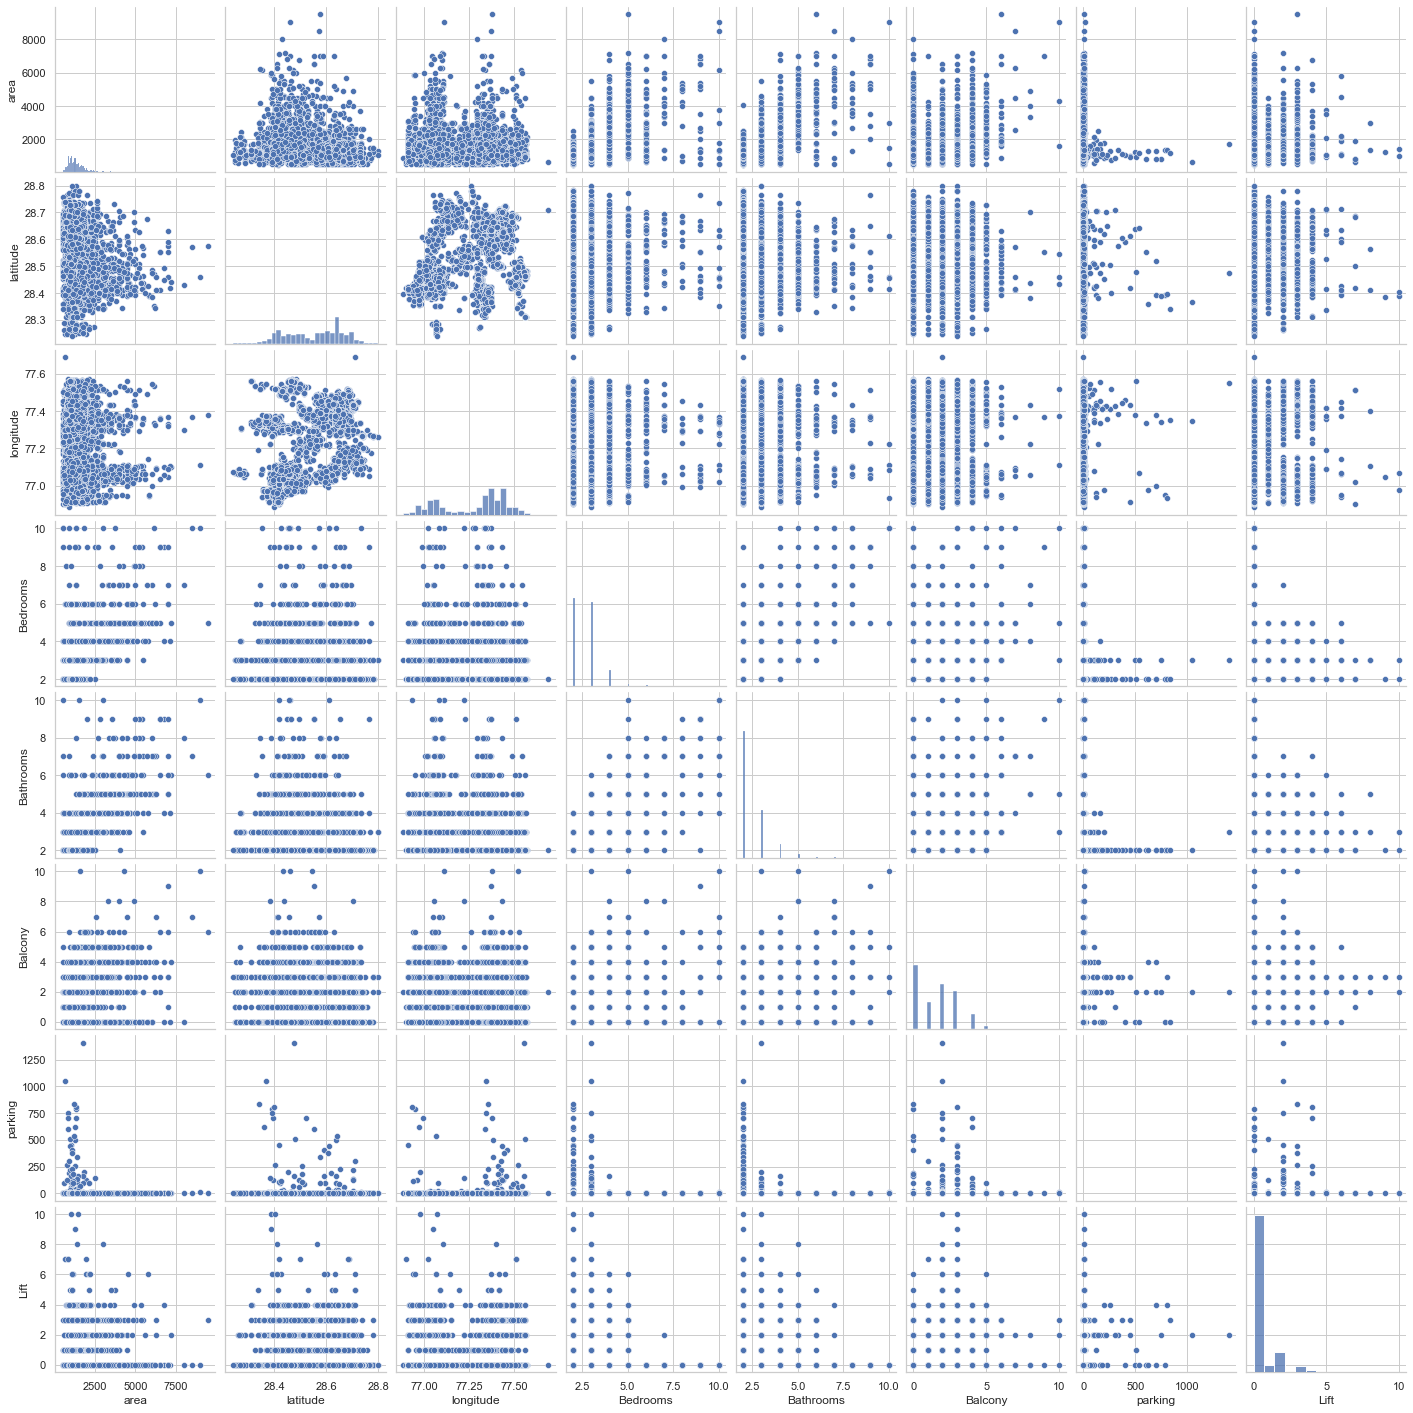

In [11]:
#Plotting Pair Graphs
plt.figure(figsize=(15,15))
sns.pairplot(df[['area','latitude','longitude','Bedrooms','Bathrooms','Balcony','parking','Lift']])
plt.show()

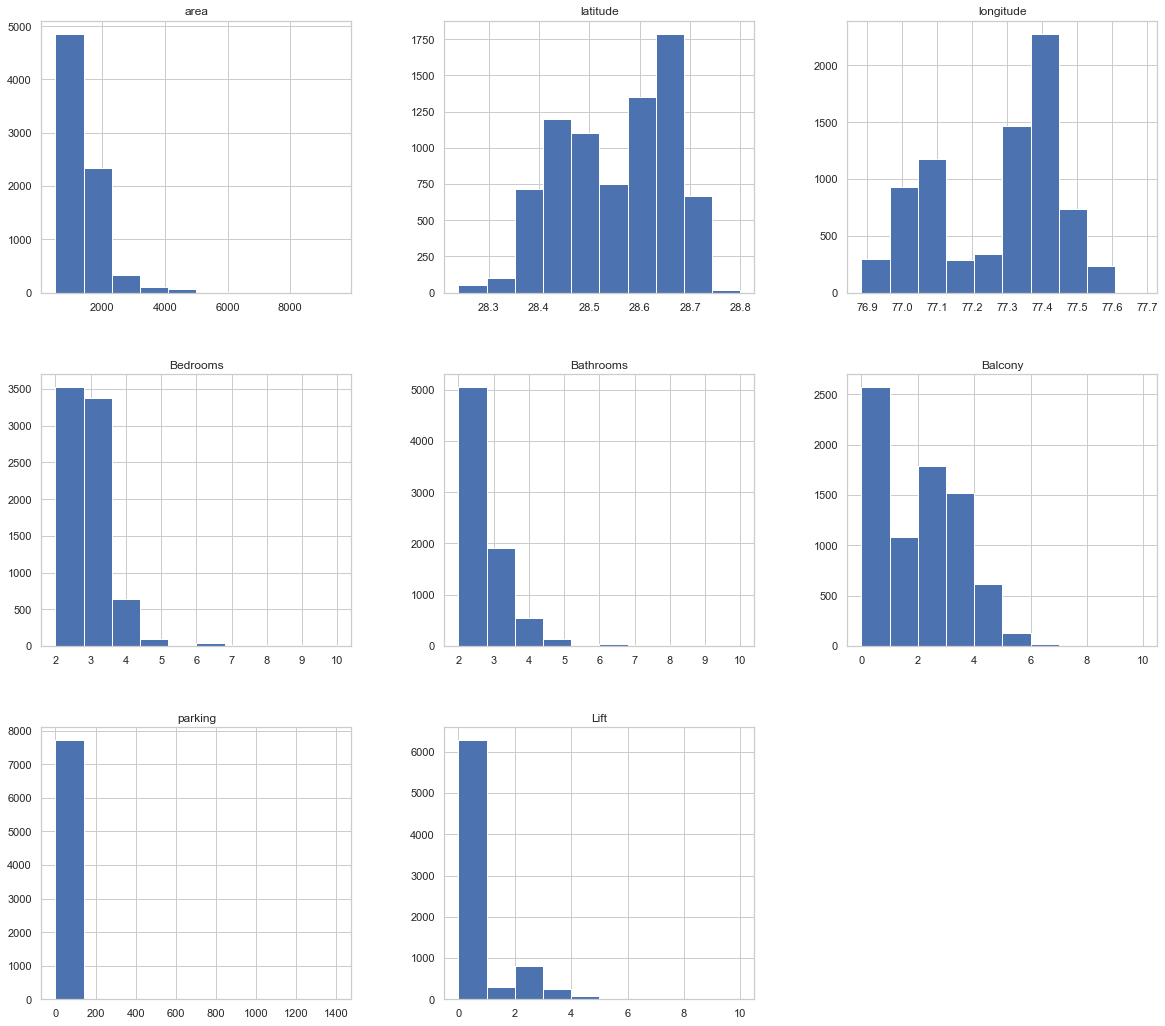

In [12]:
#Checking for Outliers
df[['area','latitude','longitude','Bedrooms','Bathrooms','Balcony','parking','Lift']].hist(figsize=(20,18))
plt.show()

## 6. Data Preprocessing
Before moving on, we need to convert all categorical features into numerical features,because machine learning algorithm doesn't work on strings or other objects.

In [13]:
#Removing Outliers
df = df[(df['area'] <= 2000)]
df = df[df['Bathrooms'] <= 4]
df = df[df['Balcony'] <= 5]
df = df[df['Bedrooms'] <= 4]
df = df[df['Lift'] <= 3]

In [14]:
#One Hot Encoding
df = pd.get_dummies(df)

In [15]:
#Splitting Independent & Target Features
x = df.drop('price',axis=1)
y = df['price']

In [16]:
#Checking Independent Features
x.head()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House
0,1350.0,28.608850,77.460560,3.0,3.0,0.0,0.0,2.0,1,0,1,0
1,1490.0,28.374236,76.952416,3.0,3.0,0.0,0.0,2.0,1,0,1,0
3,1050.0,28.566914,77.436434,2.0,2.0,3.0,1.0,2.0,1,0,1,0
4,1350.0,28.520732,77.356491,2.0,2.0,3.0,1.0,3.0,0,1,1,0
5,1150.0,28.628040,77.437809,2.0,2.0,3.0,0.0,0.0,1,0,1,0


In [17]:
#Checking Dependent Features
y.head()

0    56.0
1    88.0
3    38.1
4    62.0
5    37.0
Name: price, dtype: float64

<AxesSubplot:>

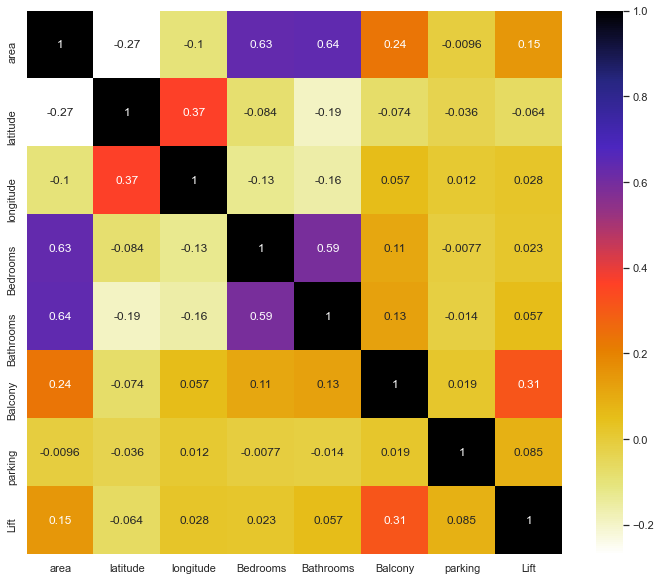

In [18]:
#Checking for High Co-relation
plt.figure(figsize=(12,10))
cor = df[['area','latitude','longitude','Bedrooms','Bathrooms','Balcony','parking','Lift']].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

## 7. Model Building

In [19]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [20]:
#Splitting Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [21]:
#Checking rows & columns for splitted data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4726, 12), (2026, 12), (4726,), (2026,))

In [22]:
#Checking X training dataset
x_train.head()

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,neworold_New Property,neworold_Resale,type_of_building_Flat,type_of_building_Individual House
1081,840.0,28.658647,77.475700,2.0,2.0,0.0,0.0,0.0,0,1,1,0
4934,1132.0,28.576390,77.436005,2.0,2.0,1.0,0.0,0.0,0,1,1,0
357,1661.0,28.604778,77.451912,3.0,3.0,3.0,0.0,0.0,0,1,1,0
1219,1326.0,28.397731,77.036526,3.0,3.0,2.0,0.0,1.0,0,1,1,0
4213,1175.0,28.562598,77.399615,2.0,2.0,2.0,1.0,0.0,0,1,1,0


In [23]:
#Checking Y training dataset
y_train.head()

1081    26.5
4934    50.0
357     57.0
1219    80.0
4213    50.0
Name: price, dtype: float64

In [24]:
#Feature Scaling
Scaler=MinMaxScaler(feature_range=(0,1))
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.transform(x_test)

In [25]:
#Checking Scaled X training dataset
x_train_scaled

array([[0.22459893, 0.74445504, 0.7358865 , ..., 1.        , 1.        ,
        0.        ],
       [0.4197861 , 0.59548072, 0.68651013, ..., 1.        , 1.        ,
        0.        ],
       [0.77339572, 0.64689429, 0.70629666, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.02406417, 0.47038299, 0.52886868, ..., 1.        , 1.        ,
        0.        ],
       [0.4552139 , 0.70905052, 0.65711941, ..., 1.        , 1.        ,
        0.        ],
       [0.11430481, 0.83015371, 0.6837773 , ..., 1.        , 0.        ,
        1.        ]])

In [26]:
#Checking Scaled X test dataset
x_test_scaled

array([[0.76604278, 0.5453789 , 0.5098954 , ..., 1.        , 1.        ,
        0.        ],
       [0.56550802, 0.28127073, 0.11708475, ..., 1.        , 1.        ,
        0.        ],
       [0.65909091, 0.82327883, 0.67942367, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.73262032, 0.25672837, 0.16764468, ..., 1.        , 0.        ,
        1.        ],
       [0.86631016, 0.56254453, 0.40592748, ..., 1.        , 1.        ,
        0.        ],
       [0.14438503, 0.85808745, 0.36153823, ..., 1.        , 1.        ,
        0.        ]])

### 1. Linear Regression

In [27]:
#Model Training
lr = LinearRegression()
lr = lr.fit(x_train_scaled,y_train)
pred = lr.predict(x_test_scaled)

In [29]:
#Performance Metrics
lr_MAE=mean_absolute_error(y_test,pred)
lr_MSE=mean_squared_error(y_test,pred)
lr_RMSE=np.sqrt(lr_MSE)
lr_r2=r2_score(y_test,pred)
lr_training_accuracy=lr.score(x_train_scaled,y_train)
lr_testing_accuracy=lr.score(x_test_scaled,y_test)

### 2. Decision Tree Regressor

In [30]:
#Model Training
dtr=DecisionTreeRegressor()
dtr.fit(x_train_scaled,y_train)
dtr_pred=dtr.predict(x_test_scaled)

In [31]:
#Performance Metrics
dt_MAE=mean_absolute_error(y_test,dtr_pred)
dt_MSE=mean_squared_error(y_test,dtr_pred)
dt_RMSE=np.sqrt(dt_MSE)
dt_r2=r2_score(y_test,dtr_pred)
dt_training_accuracy=dtr.score(x_train_scaled,y_train)
dt_testing_accuracy=dtr.score(x_test_scaled,y_test)

### 3. Random Forest Regressor

In [32]:
#Model Training
rfr=RandomForestRegressor()
rfr.fit(x_train_scaled,y_train)
rfr_pred=rfr.predict(x_test_scaled)

In [33]:
#performance metrics
rf_MAE= mean_absolute_error(y_test,rfr_pred)
rf_MSE=mean_squared_error(y_test,rfr_pred)
rf_RMSE=np.sqrt(rf_MSE)
rf_r2=r2_score(y_test,rfr_pred)
rf_training_accuracy=rfr.score(x_train_scaled,y_train)
rf_testing_accuracy=rfr.score(x_test_scaled,y_test)

### 4. Gradient Booster Regressor

In [34]:
#Model Training
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_train_scaled, y_train)
gbr_pred=gbr.predict(x_test_scaled)

In [35]:
#performance metrics
gb_MAE= mean_absolute_error(y_test,gbr_pred)
gb_MSE=mean_squared_error(y_test,gbr_pred)
gb_RMSE=np.sqrt(gb_MSE)
gb_r2=r2_score(y_test,gbr_pred)
gb_training_accuracy=gbr.score(x_train_scaled,y_train)
gb_testing_accuracy=gbr.score(x_test_scaled,y_test)

## 8. Model Evaluation

In [42]:
#Generating Model's results
results_data = {
    "Training Accuracy" : [lr_training_accuracy,dt_training_accuracy,rf_training_accuracy,gb_training_accuracy],
    "Testing Accuracy" : [lr_testing_accuracy,dt_testing_accuracy,rf_testing_accuracy,gb_testing_accuracy],
    "MAE" : [lr_MAE,dt_MAE,rf_MAE,gb_MAE],
    "MSE" : [lr_MSE,dt_MSE,rf_MSE,gb_MSE],
    "RMSE" : [lr_RMSE,dt_RMSE,rf_RMSE,gb_RMSE],
    "R2" : [lr_r2,dt_r2,rf_r2,gb_r2]
}
results_index=["Linear Regression","Decision Tree","Random Forest","Gradient Booster"]
results = pd.DataFrame(results_data,index=results_index).reset_index()
results.rename(columns={'index':'Algorithms'},inplace=True)

In [43]:
#Model Results
results

,Algorithms,Training Accuracy,Testing Accuracy,MAE,MSE,RMSE,R2
0,Linear Regression,0.560099,0.582260,15.123684,506.998312,22.516623,0.582260
1,Decision Tree,0.999682,0.760103,10.235480,291.155537,17.063280,0.760103
2,Random Forest,0.982944,0.865085,7.982618,163.742090,12.796175,0.865085
3,Gradient Booster,0.877342,0.830163,9.508163,206.125805,14.357082,0.830163


<AxesSubplot:xlabel='Algorithms', ylabel='R2'>

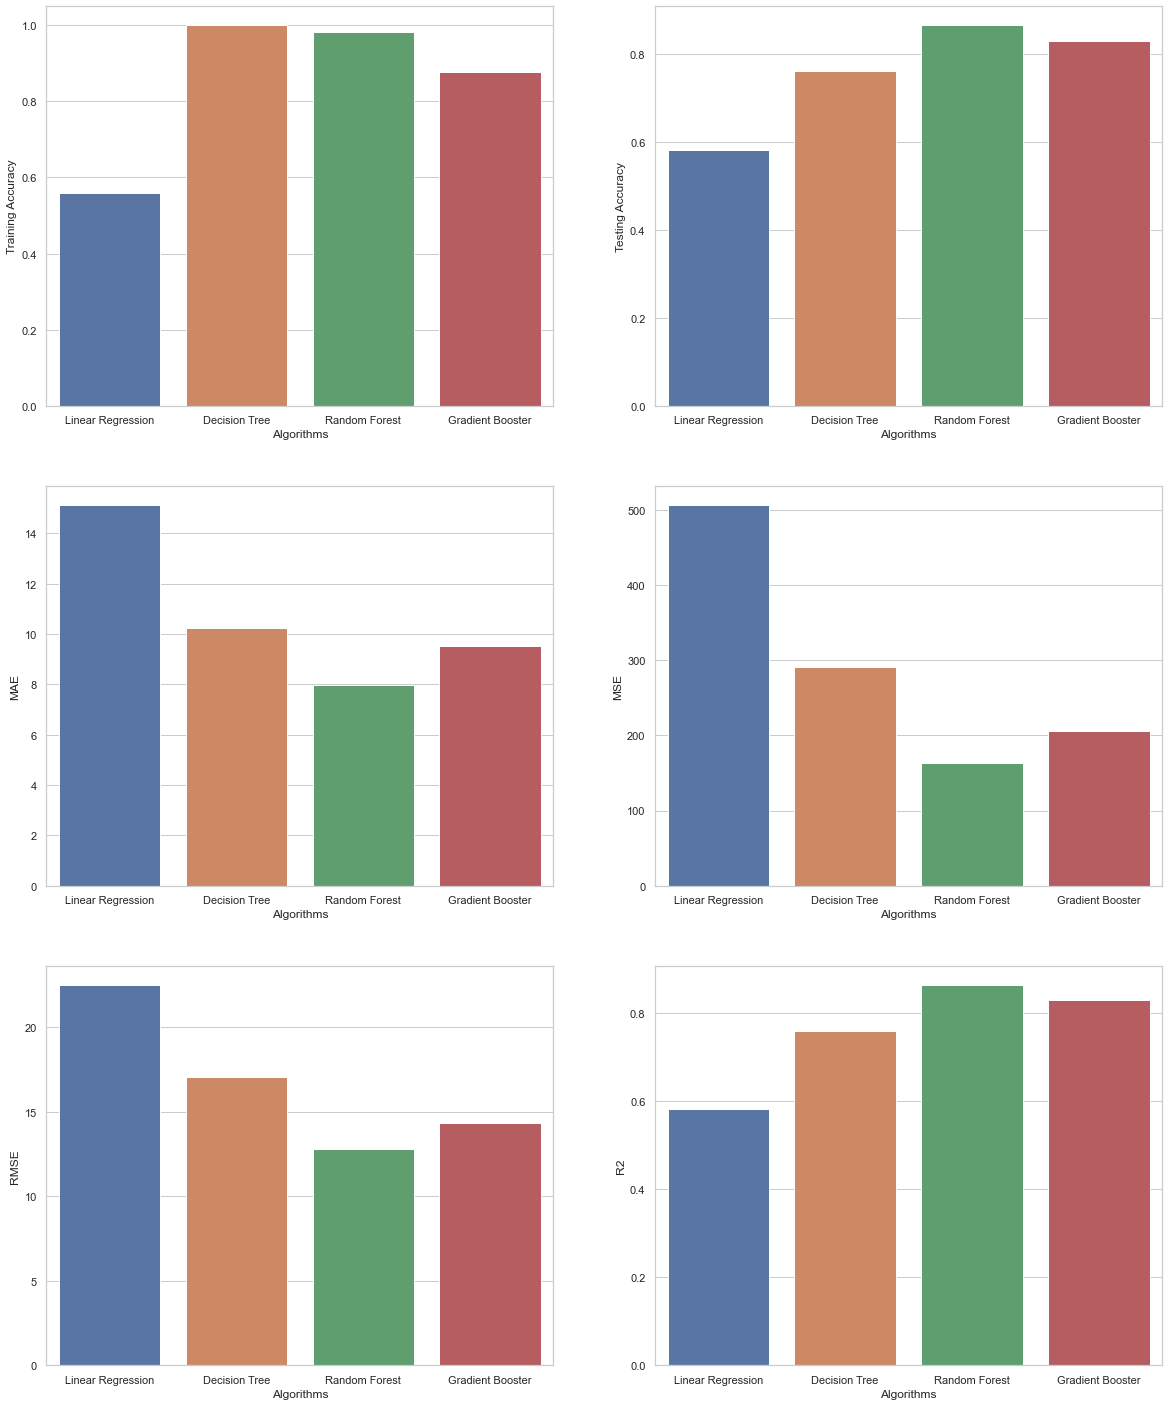

In [44]:
#Visualizing Model's results
fig, axes = plt.subplots(3, 2, figsize=(20,25))
sns.barplot(ax=axes[0, 0],data=results, x="Algorithms", y="Training Accuracy")
sns.barplot(ax=axes[0, 1],data=results, x="Algorithms", y="Testing Accuracy")
sns.barplot(ax=axes[1, 0],data=results, x="Algorithms", y="MAE")
sns.barplot(ax=axes[1, 1],data=results, x="Algorithms", y="MSE")
sns.barplot(ax=axes[2, 0],data=results, x="Algorithms", y="RMSE")
sns.barplot(ax=axes[2, 1],data=results, x="Algorithms", y="R2")

In [39]:
#Creating Prediction Dataset
pred_data = {
    "Y" : y_test,
    "LR" : pred,
    "DT" : dtr_pred,
    "RF" : rfr_pred,
    "GB" : gbr_pred
}
predictions = pd.DataFrame(pred_data)

In [40]:
#Checking Predictions Dataset
predictions.head()

,Y,LR,DT,RF,GB
7194,149.0,91.343750,180.0,181.390000,141.851826
1604,65.0,88.781250,68.5,77.693333,74.607628
1765,63.0,81.765625,62.0,57.761000,53.817199
5852,78.0,52.000000,85.0,72.083000,53.559527
2667,49.5,70.515625,51.0,50.178000,60.949803


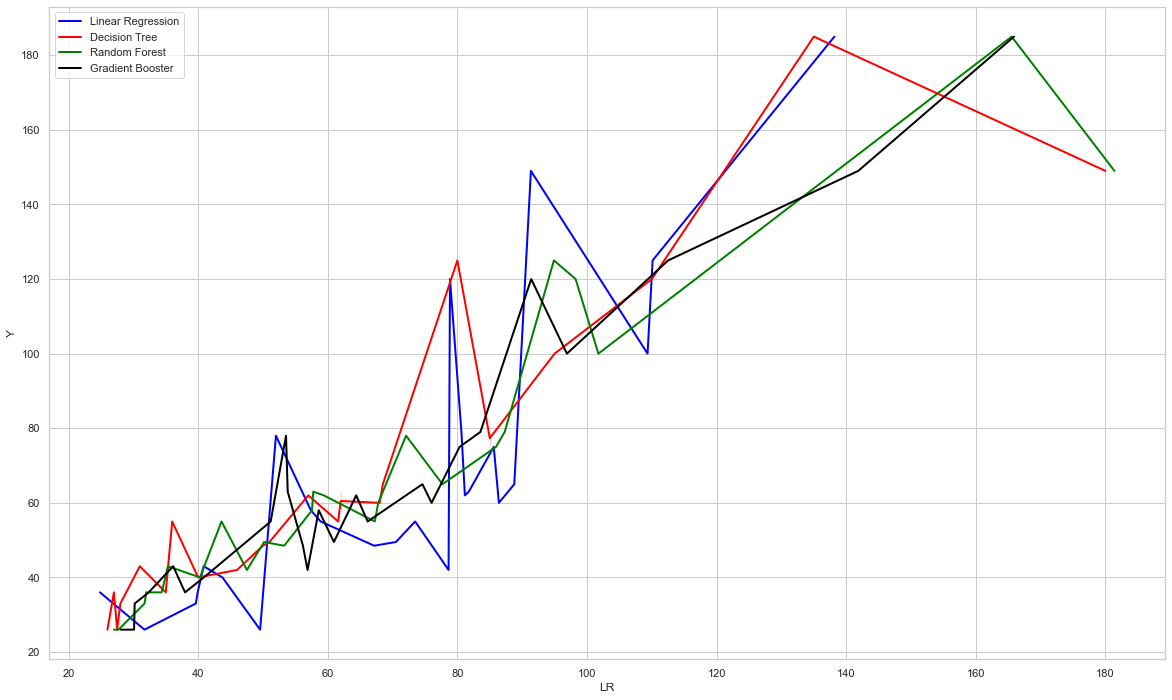

In [41]:
#Visualizing Pedicitons for first 25 rows
prediction = predictions.head(25)
plt.figure(figsize=(20,12))
sns.lineplot(x='LR',y='Y',data=prediction,color='blue',label="Linear Regression",linewidth = 2)
sns.lineplot(x='DT',y='Y',data=prediction,color='red',label="Decision Tree",linewidth = 2)
sns.lineplot(x='RF',y='Y',data=prediction,color='green',label="Random Forest",linewidth = 2)
sns.lineplot(x='GB',y='Y',data=prediction,color='black',label="Gradient Booster",linewidth = 2)
plt.show()

## 9. Observation
### Random Forest Algorithm gives the highest accuracy of 86%.